In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import xlrd
from scipy import stats

In [3]:
cab_data = pd.read_csv("C:/Users/97466/Desktop/week 2 ass/Cab_Data.csv")
city = pd.read_csv("C:/Users/97466/Desktop/week 2 ass/City.csv")
cust_id = pd.read_csv("C:/Users/97466/Desktop/week 2 ass/Customer_ID.csv")
transac = pd.read_csv("C:/Users/97466/Desktop/week 2 ass/Transaction_ID.csv")

In [4]:
transac.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [5]:
transac.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [6]:
cust_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
cust_id.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [8]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [9]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [10]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [11]:
cust_id.shape

(49171, 4)

In [12]:
cab_data.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [13]:
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))

In [14]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [15]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], format='%Y/%m/%d')

In [16]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [17]:
months=[]
years =[]
for i in range(len(cab_data['Date of Travel'])):
    months.append(cab_data['Date of Travel'][i].month)
    years.append(cab_data['Date of Travel'][i].year)
cab_data['Month'] = months
cab_data['Year'] = years

cab_data.drop('Date of Travel', axis=1, inplace=True)

In [18]:
cab_data.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [19]:
Pink_cab = cab_data[cab_data['Company']=='Pink Cab']
Yellow_cab = cab_data[cab_data['Company']=='Yellow Cab']

In [20]:
Pink_cab.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


Let us see how often these respective Taxis are used throught months

In [21]:
for col in Pink_cab.columns:
    if ' ' in col:
        Pink_cab = Pink_cab.rename(columns={col:col.replace(' ','_')})

In [22]:
Pink_grouped = Pink_cab.groupby(['Month']).Transaction_ID.count()

In [23]:
for col in Pink_cab.columns:
    if ' ' in col:
        Pink_cab = Pink_cab.rename(columns={col:col.replace(' ','_')})

In [24]:
Pink_grouped = Pink_cab.groupby(['Month']).Transaction_ID.count()

In [25]:
Pink_grouped

Month
1      5057
2      3375
3      4223
4      4083
5      4960
6      5877
7      6590
8      7739
9      9658
10    10576
11    11005
12    11568
Name: Transaction_ID, dtype: int64

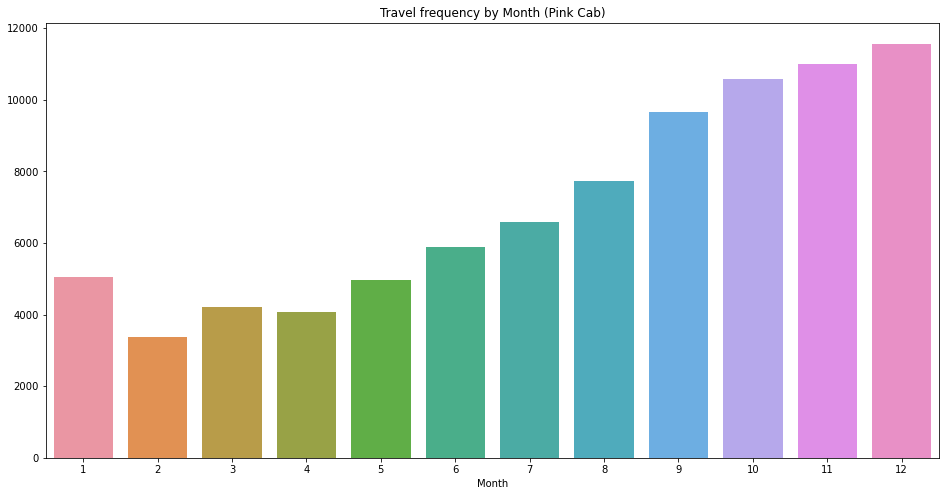

In [26]:
plt.figure(figsize=(16,8))
sns.barplot(x=Pink_grouped.index,y=Pink_grouped.values)
plt.title('Travel frequency by Month (Pink Cab)')
plt.show()

In [27]:
for col in Yellow_cab.columns:
    if ' ' in col:
        Yellow_cab = Yellow_cab.rename(columns={col:col.replace(' ','_')})

In [28]:
Yellow_grouped = Yellow_cab.groupby(['Month']).Transaction_ID.count()

In [29]:
Yellow_grouped

Month
1     18117
2     14932
3     17423
4     17351
5     18741
6     18836
7     21086
8     23584
9     27201
10    30276
11    31695
12    35439
Name: Transaction_ID, dtype: int64

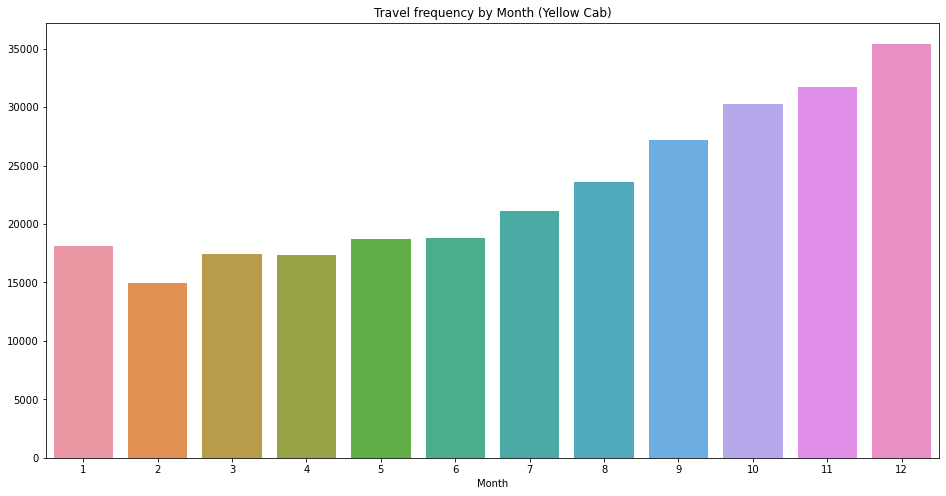

In [30]:
plt.figure(figsize=(16,8))
sns.barplot(x=Yellow_grouped.index,y=Yellow_grouped.values)
plt.title('Travel frequency by Month (Yellow Cab)')
plt.show()

So, we can see that Yellow cab was used way more than Pink cab with peaks as high as 35,000 for Yellow and 12,000 for Pink.

Let's check the volume of times these taxis were used through the 3 years.

In [31]:
for col in cab_data.columns:
    if ' ' in col:
        cab_data = cab_data.rename(columns={col:col.replace(' ','_')})

In [32]:
over_the_years = cab_data.groupby(['Year','Company']).Transaction_ID.count()

In [33]:
over_the_years.head()

Year  Company   
2016  Pink Cab      25080
      Yellow Cab    82239
2017  Pink Cab      30321
      Yellow Cab    98189
2018  Pink Cab      29310
Name: Transaction_ID, dtype: int64

<AxesSubplot:xlabel='Year'>

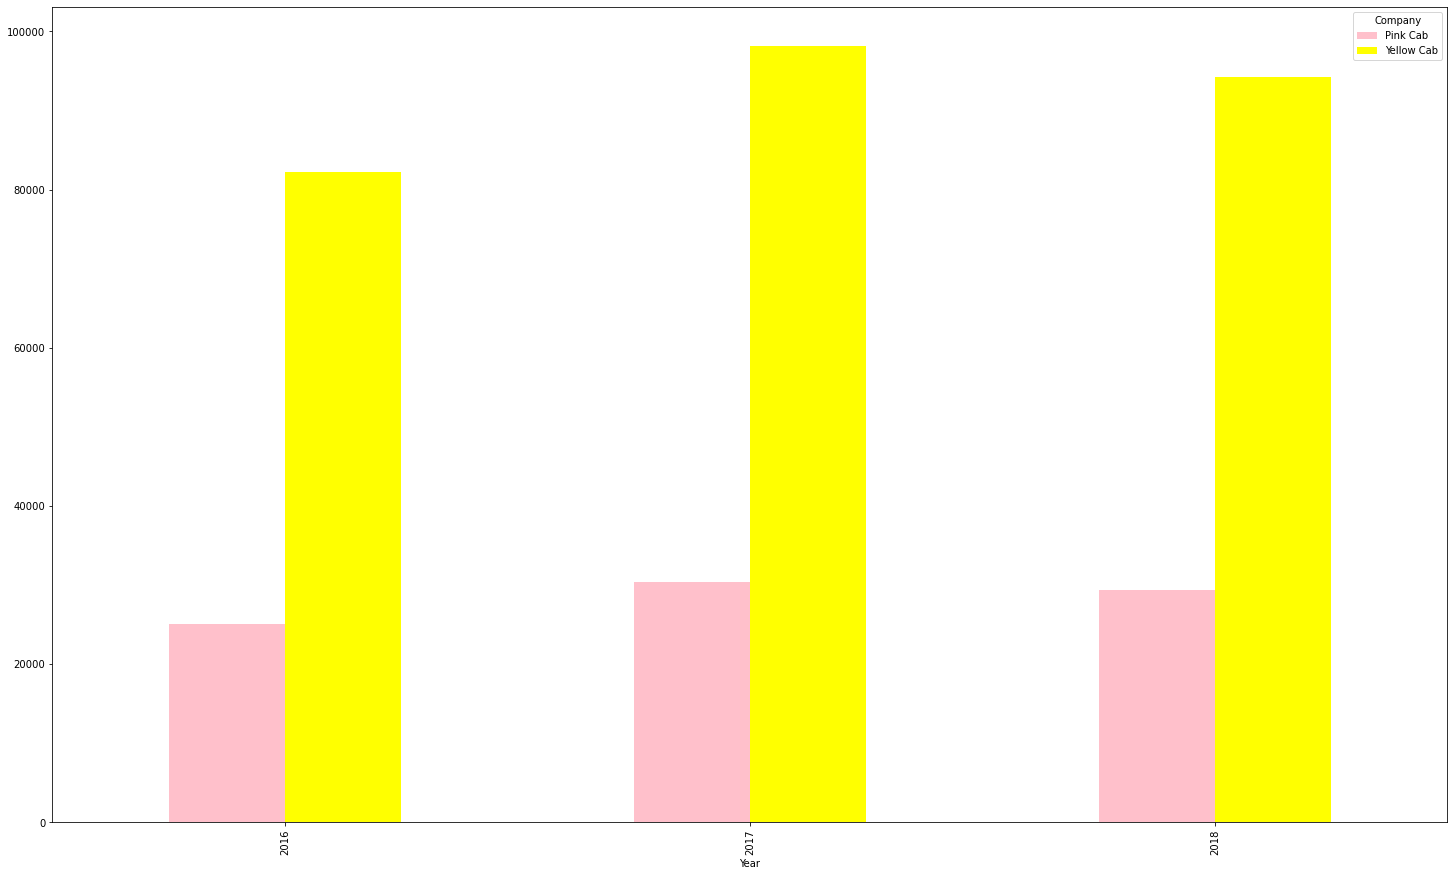

In [34]:
figure, axis = plt.subplots(figsize=(25,15))
over_the_years.unstack().plot(ax=axis, kind = 'bar', color = ['pink','yellow'])

In [35]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [36]:
for col in city.columns:
    if ' ' in col:
        city = city.rename(columns={col:col.replace(' ','_')})

In [37]:
merged_city_data = pd.merge(cab_data, city, on = 'City', how = 'inner')

In [38]:
merged_city_data.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Population,Users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,"814,885","24,701"
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,"814,885","24,701"
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,"814,885","24,701"
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,"814,885","24,701"
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,"814,885","24,701"


In [39]:
city_volume = merged_city_data.groupby('City').Transaction_ID.count()

In [40]:
city_volume

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Transaction_ID, dtype: int64

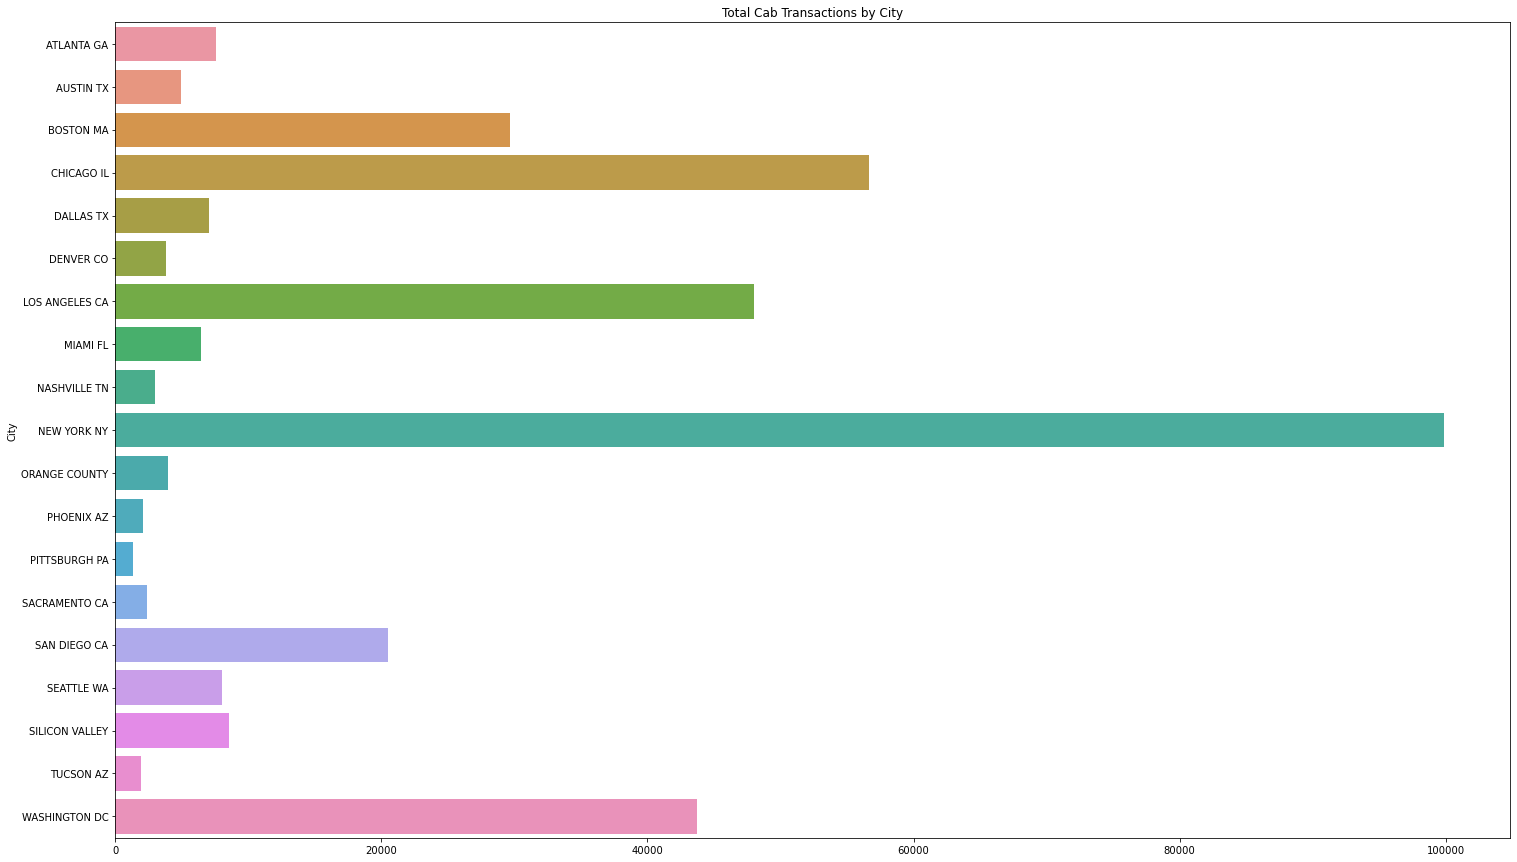

In [41]:
plt.figure(figsize = (25,15))
sns.barplot(x = city_volume.values, y = city_volume.index)
plt.title('Total Cab Transactions by City')
plt.show()

So, we can see that New York city was the city with most transaction(rides) comparatively.

In [42]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [43]:
merged_city_data

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Population,Users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,"814,885","24,701"
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,"814,885","24,701"
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,"814,885","24,701"
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,"814,885","24,701"
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018,"418,859","127,001"
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018,"418,859","127,001"
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018,"418,859","127,001"
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,1,2018,"418,859","127,001"


Let us find out how the consumer share was through the three years.

In [44]:
for col in cust_id.columns:
    if ' ' in col:
        cust_id = cust_id.rename(columns={col:col.replace(' ','_')})

In [45]:
cust_id.head()

,Customer_ID,Gender,Age,Income_(USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [46]:
cab_data.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [47]:
for col in transac.columns:
    if ' ' in col:
        transac = transac.rename(columns={col:col.replace(' ','_')})

In [48]:
transac.head()

,Transaction_ID,Customer_ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [49]:
merged1 = pd.merge(cab_data,transac,on = 'Transaction_ID', how = 'inner')

In [50]:
merged2 = pd.merge(merged1,cust_id, on = 'Customer_ID', how = 'inner')

In [51]:
merged2

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card,Male,28,10813
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,29290,Cash,Male,28,10813
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,29290,Card,Male,28,10813
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card,Male,27,9237
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,1,2018,38520,Card,Female,42,19417
359388,10439799,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,1,2018,12490,Cash,Male,33,18713
359389,10439838,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,1,2018,41414,Card,Male,38,3960
359390,10439840,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,1,2018,41677,Cash,Male,23,19454


In [52]:
merged2016 = merged1[merged1['Year'] == 2016]

In [53]:
merged2016

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,1,2016,28712,Cash
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,1,2016,28020,Cash
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,1,2016,27182,Card
...,...,...,...,...,...,...,...,...,...,...
110081,10134674,Yellow Cab,WASHINGTON DC,31.31,565.59,409.5348,12,2016,52004,Cash
110111,10134704,Yellow Cab,WASHINGTON DC,10.35,180.63,141.5880,12,2016,52285,Cash
110116,10134709,Yellow Cab,WASHINGTON DC,32.30,515.04,422.4840,12,2016,53510,Card
110119,10134712,Yellow Cab,WASHINGTON DC,33.66,651.11,476.6256,12,2016,53454,Cash


In [54]:
Pink_perc = merged2016[merged2016['Company'] == 'Pink Cab']

In [55]:
Pink_perc

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016,29290,Card
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016,27703,Card
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016,28712,Cash
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016,28020,Cash
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016,27182,Card
...,...,...,...,...,...,...,...,...,...,...
107920,10132319,Pink Cab,SILICON VALLEY,3.21,50.80,36.273,12,2016,14308,Card
107929,10132328,Pink Cab,SILICON VALLEY,28.13,460.85,303.804,12,2016,13183,Card
107935,10132334,Pink Cab,TUCSON AZ,21.00,282.34,233.100,12,2016,39856,Card
107939,10132338,Pink Cab,TUCSON AZ,33.17,469.44,351.602,12,2016,41716,Cash


In [56]:
Pink_percentage2016 = (Pink_perc.shape[0]/merged2016.shape[0])*100
Pink_percentage2016

23.36958040980628

In [57]:
Y_perc = merged2016[merged2016['Company'] == 'Yellow Cab']

In [58]:
Y_percentage2016 = (Y_perc.shape[0]/merged2016.shape[0])*100
Y_percentage2016

76.63041959019372

In [59]:
merged2017 = merged1[merged1['Year'] == 2017]

In [60]:
Pink_perc1 = merged2017[merged2017['Company'] == 'Pink Cab']

In [61]:
Pink_percentage2017 = (Pink_perc1.shape[0]/merged2017.shape[0])*100

In [62]:
Y_perc1 = merged2017[merged2017['Company'] == 'Yellow Cab']

In [63]:
Y_percentage2017 = (Y_perc1.shape[0]/merged2017.shape[0])*100

In [64]:
merged2018 = merged1[merged1['Year'] == 2018]

In [65]:
Pink_perc2 = merged2018[merged2018['Company'] == 'Pink Cab']

In [66]:
Pink_percentage2018 = (Pink_perc2.shape[0]/merged2018.shape[0])*100

In [67]:
Y_perc2 = merged2018[merged2018['Company'] == 'Yellow Cab']

In [68]:
Y_percentage2018 = (Y_perc2.shape[0]/merged2018.shape[0])*100

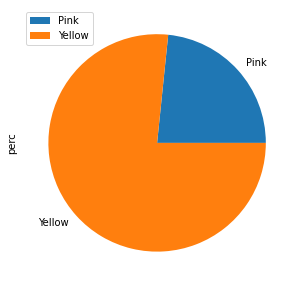

In [69]:
df = pd.DataFrame({'perc': [Pink_percentage2016,Y_percentage2016]}, index = ['Pink','Yellow'])
plot = df.plot.pie(y='perc', figsize=(5, 5))

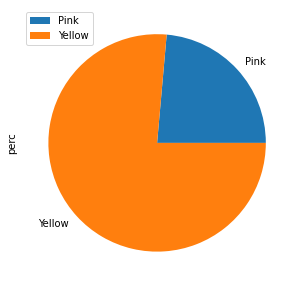

In [70]:
df1 = pd.DataFrame({'perc': [Pink_percentage2017,Y_percentage2017]}, index = ['Pink','Yellow'])
plot1 = df1.plot.pie(y='perc', figsize=(5, 5))

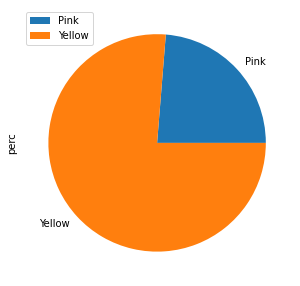

In [71]:
df2 = pd.DataFrame({'perc': [Pink_percentage2018,Y_percentage2018]}, index = ['Pink','Yellow'])
plot2 = df2.plot.pie(y='perc', figsize=(5, 5))

over the years, the ratio remained almost same for the companies usage.

In [72]:
Male = merged2[merged2['Gender'] == 'Male']

In [73]:
Female = merged2[merged2['Gender'] == 'Female']

In [74]:
male_perc = (Male.shape[0]/merged2.shape[0])*100
male_perc

57.294541892974806

In [75]:
female_perc = (Female.shape[0]/merged2.shape[0])*100
female_perc

42.705458107025194

In [76]:
merged2['Profit'] = merged2['Price_Charged'] - merged2['Cost_of_Trip']

In [77]:
profits_per_year = merged2.groupby(['Year','Company']).Profit.sum()
profits_per_year

Year  Company   
2016  Pink Cab      1.713511e+06
      Yellow Cab    1.392700e+07
2017  Pink Cab      2.033655e+06
      Yellow Cab    1.657598e+07
2018  Pink Cab      1.560162e+06
      Yellow Cab    1.351740e+07
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Year'>

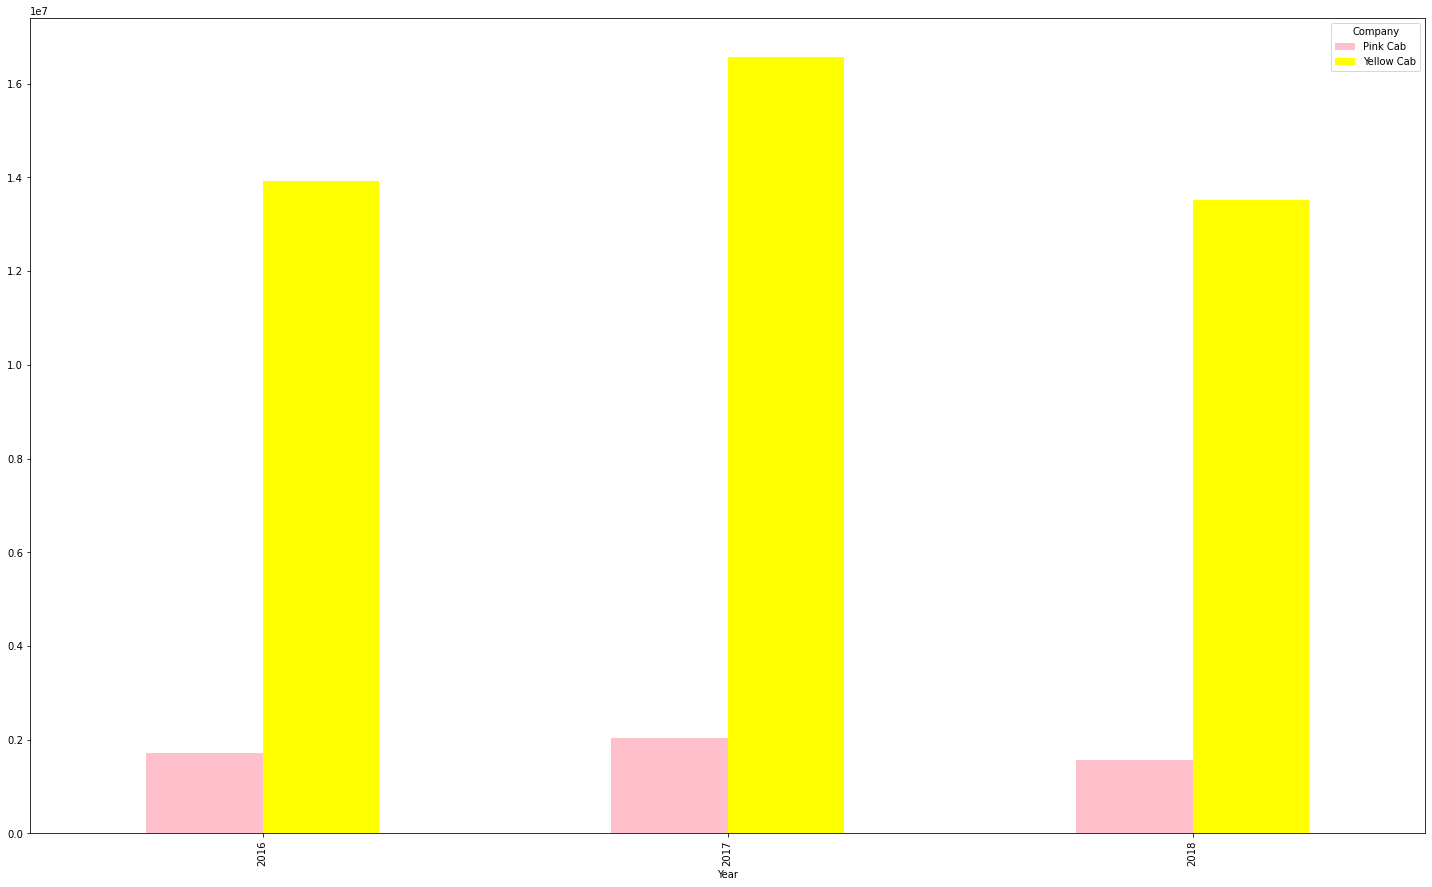

In [78]:
fig1, axis1 = plt.subplots(figsize=(25,15))
profits_per_year.unstack().plot(ax=axis1, kind = 'bar', color = ['pink','yellow'])

As we can see that in 2018 there was a major drop in Yellow Taxi profit but Pink remained almost the same.

In [79]:
profits_ranked = merged2.Profit.sort_values(ascending=False)
profits_ranked

96554     1463.9660
12320     1445.2720
64435     1433.3420
250571    1424.1408
20317     1408.3440
            ...    
296075    -164.0400
227126    -168.9850
300207    -176.9308
204413    -198.6980
127209    -220.0600
Name: Profit, Length: 359392, dtype: float64

In [80]:
Max_Profit_Place = merged2[merged2['Profit'] == merged2.Profit.max()]
Max_Profit_Place

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Profit
96554,10170615,Yellow Cab,NEW YORK NY,46.8,2048.03,584.064,5,2017,1126,Cash,Male,18,8825,1463.966


<AxesSubplot:xlabel='KM_Travelled', ylabel='Profit'>

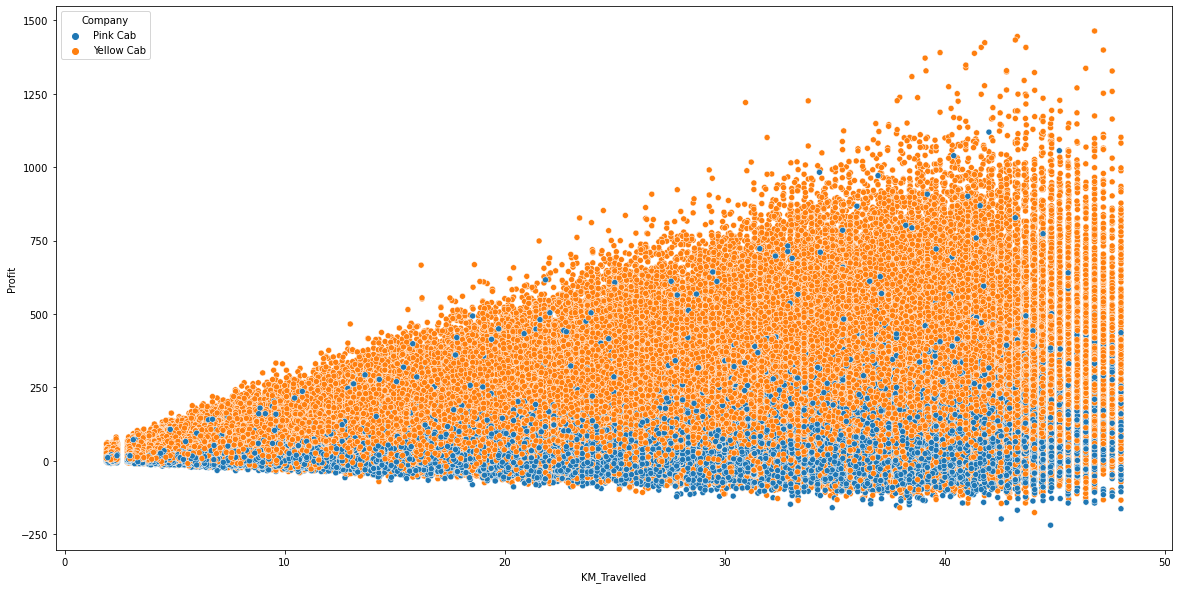

In [81]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=merged2, x="KM_Travelled", y="Profit", hue="Company")

<AxesSubplot:xlabel='KM_Travelled', ylabel='Profit'>

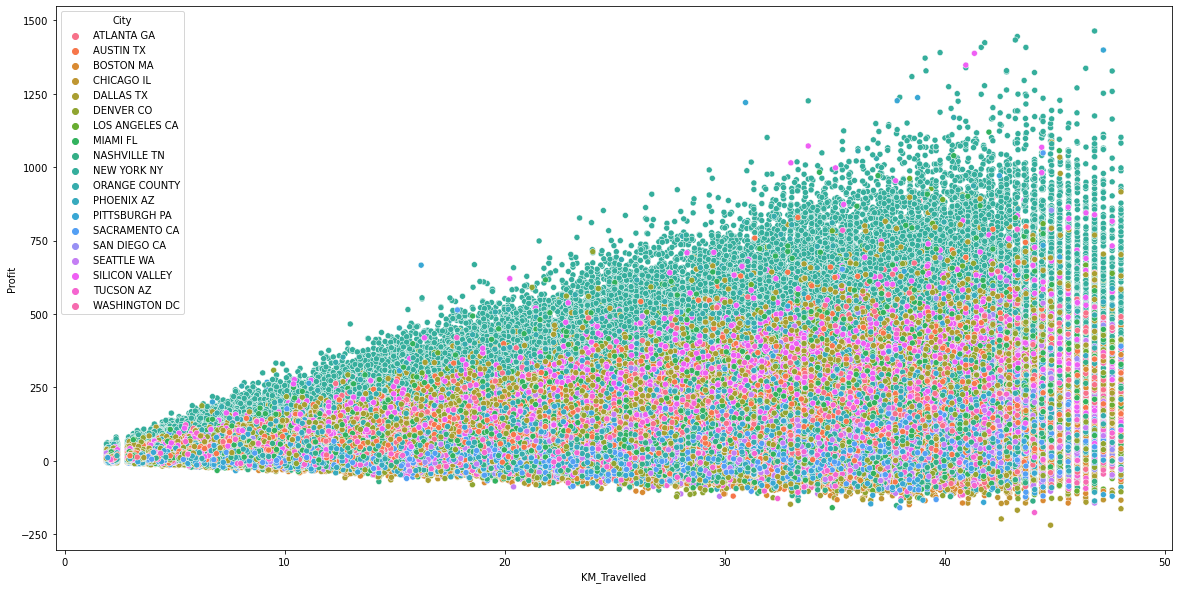

In [82]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=merged2, x="KM_Travelled", y="Profit", hue="City")

New York city has the highest profit as the KMs increased.

In [83]:
payments = merged2.groupby(['Company','Payment_Mode']).Price_Charged.mean()
payments

Company     Payment_Mode
Pink Cab    Card            311.197319
            Cash            310.209299
Yellow Cab  Card            457.924979
            Cash            458.567368
Name: Price_Charged, dtype: float64

<AxesSubplot:xlabel='Company'>

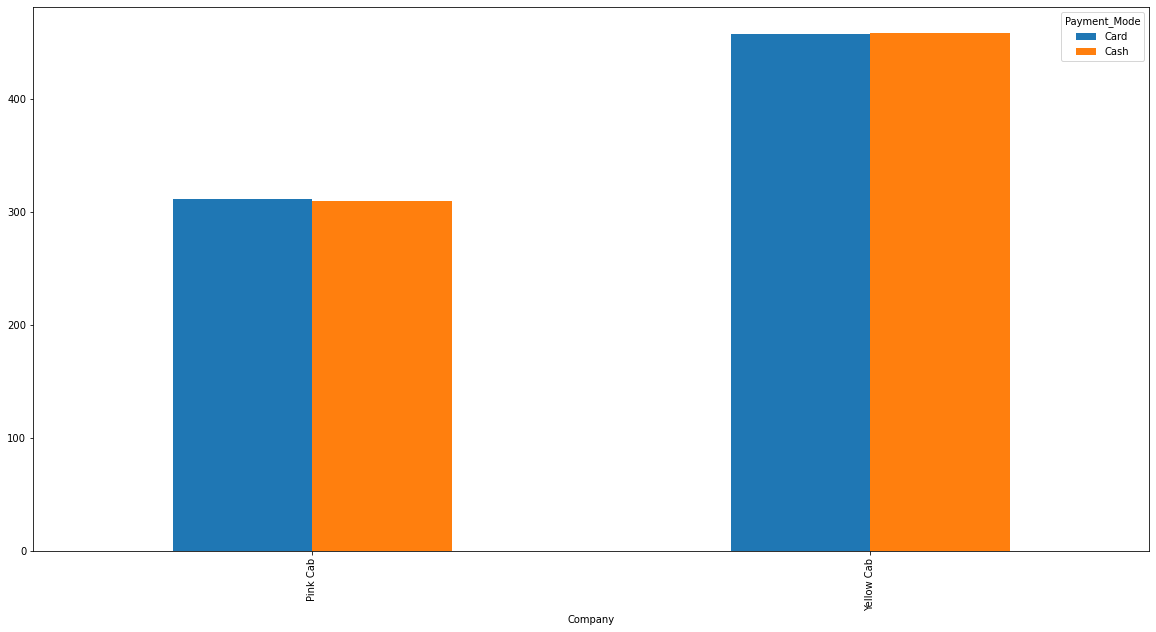

In [84]:
figure1, axis3 = plt.subplots(figsize=(20,10))
payments.unstack().plot(ax=axis3,kind = 'bar')

Both the companies recieved payments equally in card and cash.

Hypothesis testing

Hypothesis 1:

Null: There is difference in number of people who pay by Card and Cash for yellow cab.
Alternate: There is no difference in number of people who pay by Card and Cash for yellow cab.

In [88]:
m = merged2[['Company','Price_Charged','Payment_Mode']]
c = m[m['Company'] == 'Pink Cab']
cash_pink = c[c['Payment_Mode'] == 'Cash']
card_pink = c[c['Payment_Mode'] == 'Card']

In [89]:
stats.ttest_ind(cash_pink.Price_Charged,card_pink.Price_Charged)

Ttest_indResult(statistic=-0.7744750456153074, pvalue=0.4386520812775526)

We accept the null hypothesis as p value is > 0.05.

Hypothesis 2:
    
Null: There is difference in number of people who pay by Card and Cash for pink cab.
Alternate: There is no difference in number of people who pay by Card and Cash for pink cab.

In [90]:
d = m[m['Company'] == 'Yellow Cab']

In [91]:
cash_yellow = d[d['Payment_Mode'] == 'Cash']
card_yellow = d[d['Payment_Mode'] == 'Card']

In [120]:
stats.ttest_ind(cash_yellow.Price_Charged,card_yellow.Price_Charged)

Ttest_indResult(statistic=0.5719506609006757, pvalue=0.5673558691551936)

We accept the null hypothesis as p value is > 0.05.

In [107]:
gender1 = merged2.groupby(['Company','Gender']).Price_Charged.mean()
gender1

Company     Gender
Pink Cab    Female    310.624823
            Male      310.940547
Yellow Cab  Female    454.571538
            Male      460.821326
Name: Price_Charged, dtype: float64

<AxesSubplot:xlabel='Company'>

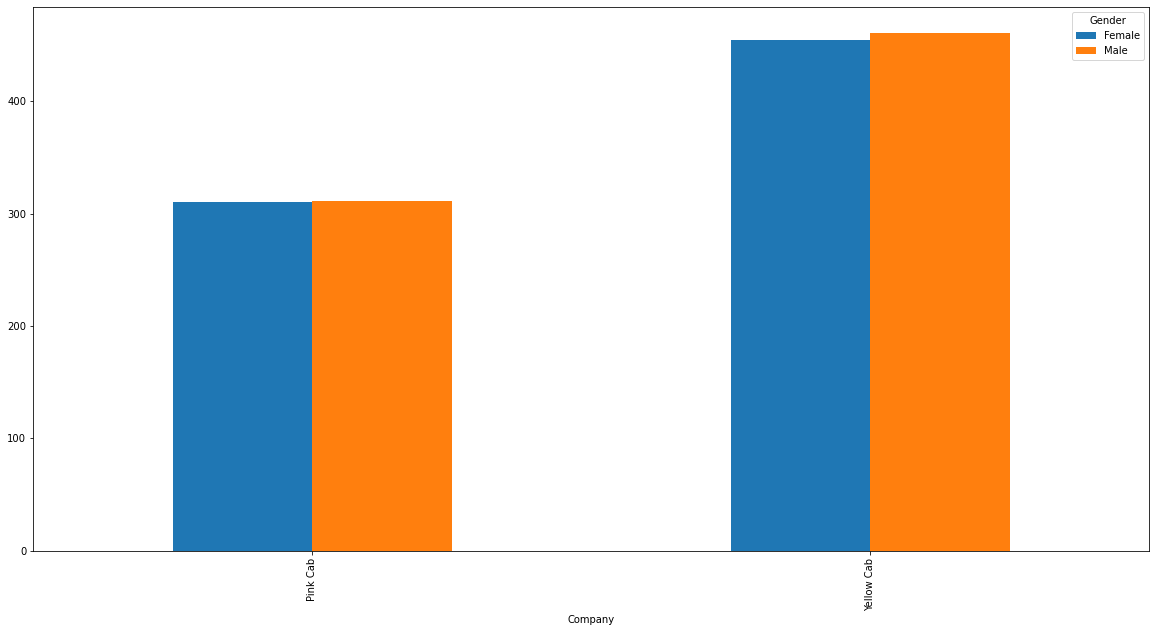

In [108]:
figure4,axis4 = plt.subplots(figsize=(20,10))
gender1.unstack().plot(ax=axis4,kind='bar')

Hypothesis 3:

Null: males bring in less profits than females for Yellow Cab.
Alternate: males bring in more profits than females for Yellow Cab.

In [115]:
female_profit_data = merged2[(merged2.Gender=='Female')&(merged2.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
male_profit_data = merged2[(merged2.Gender=='Male')&(merged2.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

stats.ttest_ind(female_profit_data,male_profit_data)

Ttest_indResult(statistic=-10.31549420719532, pvalue=6.060473042494144e-25)

We accept the alternate hypothesis as p value is < 0.05.

Hypothesis 4:

Null: Females bring in different profits as Males for pink Cab.
Alternate: Females bring in same profits than Males for pink Cab. 

In [119]:
female_profit_data1 = merged2[(merged2.Gender=='Female')&(merged2.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
male_profit_data1 = merged2[(merged2.Gender=='Male')&(merged2.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

stats.ttest_ind(female_profit_data1,male_profit_data1)

Ttest_indResult(statistic=-1.5754642478511207, pvalue=0.11515305900425798)

We accept the null hypothesis as p value is > 0.05.

Hypothesis 5:

Null: Cost of trip for male and female is same for pink cab
Alternate: Cost of trip for male and female is different for pink cab

In [95]:
cost = merged2.groupby(['Company','Gender']).Cost_of_Trip.mean()
cost

Company     Gender
Pink Cab    Female    248.444121
            Male      247.914237
Yellow Cab  Female    298.266214
            Male      297.670378
Name: Cost_of_Trip, dtype: float64

<AxesSubplot:xlabel='Company'>

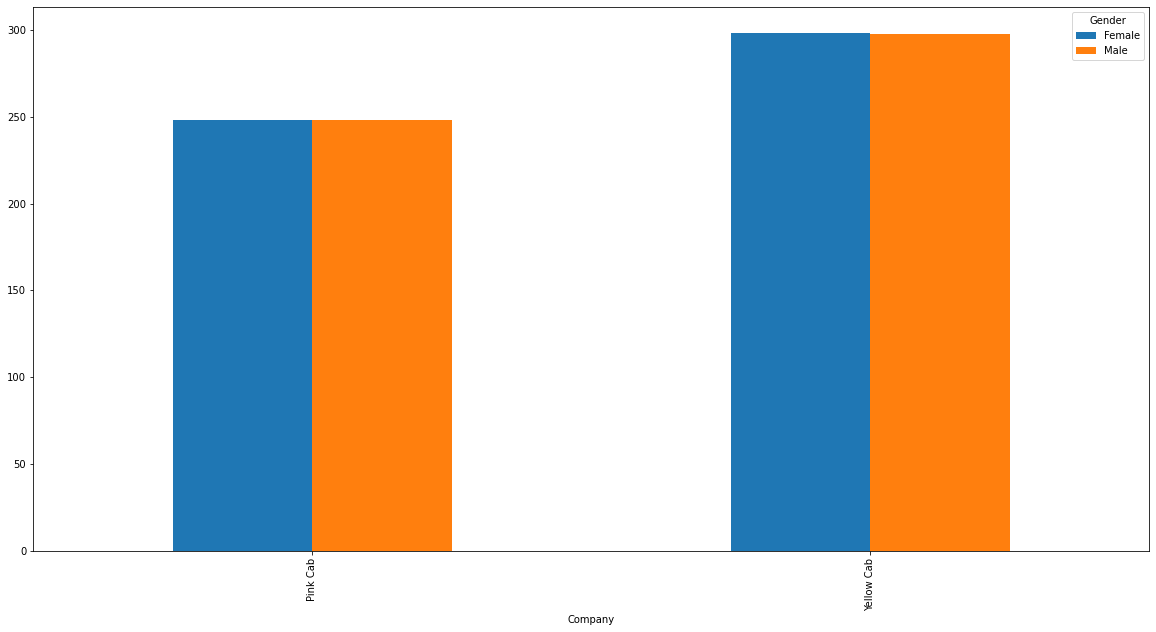

In [96]:
figure5, axis5 = plt.subplots(figsize=(20,10))
cost.unstack().plot(ax=axis5,kind = 'bar')

In [118]:
female_cost_data_pink = merged2[(merged2.Gender=='Female')&(merged2.Company=='Pink Cab')].groupby('Transaction_ID').Cost_of_Trip.mean()
male_cost_data_pink = merged2[(merged2.Gender=='Male')&(merged2.Company=='Pink Cab')].groupby('Transaction_ID').Cost_of_Trip.mean()

stats.ttest_ind(female_cost_data_pink,male_cost_data_pink)

Ttest_indResult(statistic=0.5657091706365529, pvalue=0.5715929984922214)

We accept the null hypothesis as p value is > 0.05.

Hypothesis 6:

Null: Cost of trip for male and female is different for Yellow cab
Alternate: Cost of trip for male and female is same for Yellow cab

In [117]:
female_cost_data_yellow = merged2[(merged2.Gender=='Female')&(merged2.Company=='Yellow Cab')].groupby('Transaction_ID').Cost_of_Trip.mean()
male_cost_data_yellow = merged2[(merged2.Gender=='Male')&(merged2.Company=='Yellow Cab')].groupby('Transaction_ID').Cost_of_Trip.mean()

stats.ttest_ind(female_cost_data_yellow,male_cost_data_yellow)

Ttest_indResult(statistic=0.948897235613972, pvalue=0.3426737155073213)

We accept the null hypothesis as p value is > 0.05.